# Create connected graph about speaker

In [11]:
import random, os, json
from scipy.sparse.csgraph import connected_components
import numpy as np
from audio_processing.cosine_pair import cos_pair
def find_connected_components(data, threshold=0.75):
    """
    Phát hiện các thành phần liên thông dựa trên độ tương đồng cosine
    
    Args:
        data: List[dict] - Danh sách các dict chứa wav_name và embedding
        threshold: float - Ngưỡng cosine similarity để nối 2 node
        
    Returns:
        List[List[str]] - Danh sách các nhóm file WAV liên thông
    """
    n = len(data)
    embeddings = [np.array(item['embedding']) for item in data]
    
    # Tạo ma trận adjacency
    adjacency = np.zeros((n, n), dtype=bool)
    for i in range(n):
        for j in range(i+1, n):
            if cos_pair(embeddings[i], embeddings[j]) > threshold:
                adjacency[i][j] = True
                adjacency[j][i] = True
    
    # Tìm các thành phần liên thông
    _, labels = connected_components(adjacency, directed=False)
    
    # Gom nhóm kết quả
    components = {}
    for idx, label in enumerate(labels):
        components.setdefault(label, []).append(data[idx]['wav_name'])
    
    return list(components.values())

embedding_root = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/07_speaker_embedding'
for playlist_name in os.listdir(embedding_root):
    playlist_path = os.path.join(embedding_root, playlist_name)
    
    for episode_filename in os.listdir(playlist_path):
        # print(f"Processing {episode_filename} in {playlist_name}...")

        save_path = os.path.join('/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode', playlist_name, f"{episode_filename.rsplit('.', 1)[0]}.json")
        if os.path.exists(save_path):
            # print(f"File {save_path} already exist, skipping...")
            continue

        os.makedirs(os.path.join('/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode', playlist_name), exist_ok=True)
        episode_filepath = os.path.join(playlist_path, episode_filename)

        with open(episode_filepath, 'r') as f:
            data = json.load(f)
        
        dct_speaker = {}
        for key, value in data.items():
            speaker = value['speaker_id']
            if speaker not in dct_speaker:
                dct_speaker[speaker] = []
            dct_speaker[speaker].append({'wav_name': value['wav_name'], 'embedding': value['global_embedding']})

        for key, value in dct_speaker.items():
            print(len(value))
        dct_episode = {}
        for speaker, items in dct_speaker.items():
            # print(speaker)
            # print(items)
            list_connected_components = max(find_connected_components(items), key=len)
            # print(f"Speaker: {speaker}, Components: {list_connected_components}")
            if len(list_connected_components) >= 20:
                selected_components = random.sample(list_connected_components, 20)
            else:
                selected_components = list_connected_components
                # continue
            embedding_map = {item['wav_name']: item['embedding'] for item in items}
            selected_embeddings = [embedding_map[name] for name in selected_components]
            average_embedding = np.mean(selected_embeddings, axis=0)
            if len(list_connected_components) <=4 :
                continue
            dct_episode[speaker] = {
                'average_embedding': average_embedding.tolist(),
                'wav_names': list_connected_components
            }
        # Save the processed data
        
        with open(save_path, 'w') as f:
            json.dump(dct_episode, f, ensure_ascii=False, indent=4)
        # break
    # break

27
12
13
6
6
11
3
6
4
3
8
25
11
10
2
11
10
20
5
11
10
7
8
15
4
23
12
11
15
6
1
10
9
8
1
22
9
13
4
16
29
1
5
6
16
16
11
6
25
13
8
20
3
16
8
3
7
3
23
11
9
9
13
9
7
1
12
3
11
19
11
16
11
15
15
1
5
20
9
8
2
9
7
1
21
7
21
18
7
13
11
4
8
1
6
11
18
15
17
20
9
8
19
12
10
24
6
14
11
5
24
14
8
14
13
13
2
1
11
10
6
16
6
8
7
19
13
22
11
12
22
6
13
11
4
19
6
8
13
25
6
2
3
11
9
15
2
2
8
1
1
11
18
6
44
19
64
8
21
23
5
35
67
1
8
43
12
14
19
18
32
17
29
7
12
29
7
13
19
44
34
18
35
29
22
21
15
23
24
63
10
32
28
18
13
29
30
24
19
27
11
10
32
19
9
31
7
48
22
21
28
6
30
48
15
20
34
3
1
45
23
16
13
25
15
25
18
19
29
19
14
10
5
57
57
21
37
31
8
2
4
33
35
15
10
16
66
35
16
40
7
25
3
44
21
7
20
22
10
33
17
23
48
3
13
24
22
36
40
17
23
11
15
20
55
31
23
14
18
43
22
20
20
16
58
17
28
11


In [ ]:
import random, os, json
from scipy.sparse.csgraph import connected_components
import numpy as np
from audio_processing.cosine_pair import cos_pair
def find_connected_components(data, threshold=0.85):
    """
    Phát hiện các thành phần liên thông dựa trên độ tương đồng cosine
    
    Args:
        data: List[dict] - Danh sách các dict chứa wav_name và embedding
        threshold: float - Ngưỡng cosine similarity để nối 2 node
        
    Returns:
        List[List[str]] - Danh sách các nhóm file WAV liên thông
    """
    n = len(data)
    embeddings = [np.array(item['embedding']) for item in data]
    
    # Tạo ma trận adjacency
    adjacency = np.zeros((n, n), dtype=bool)
    for i in range(n):
        for j in range(i+1, n):
            if cos_pair(embeddings[i], embeddings[j]) > threshold:
                adjacency[i][j] = True
                adjacency[j][i] = True
    
    # Tìm các thành phần liên thông
    _, labels = connected_components(adjacency, directed=False)
    
    # Gom nhóm kết quả
    components = {}
    for idx, label in enumerate(labels):
        components.setdefault(label, []).append(data[idx]['wav_name'])
    
    return list(components.values())

embedding_root = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/07_speaker_embedding'
for playlist_name in os.listdir(embedding_root):
    playlist_path = os.path.join(embedding_root, playlist_name)
    ls_speaker = []
    for episode_filename in os.listdir(playlist_path):
        # print(f"Processing {episode_filename} in {playlist_name}...")

        save_path = os.path.join('/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode', playlist_name, f"{episode_filename.rsplit('.', 1)[0]}.json")
        if os.path.exists(save_path):
            # print(f"File {save_path} already exist, skipping...")
            continue

        os.makedirs(os.path.join('/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode', playlist_name), exist_ok=True)
        episode_filepath = os.path.join(playlist_path, episode_filename)

        with open(episode_filepath, 'r') as f:
            data = json.load(f)
        
        # ls_speaker = []
        for key, value in data.items():
            ls_speaker.append({'wav_name': value['wav_name'], 'embedding': value['global_embedding']})

    dct_episode = {}
    print(len(ls_speaker))
    # for items in ls_speaker:
        # print(speaker)
        # print(items)
    list_connected_components = find_connected_components(ls_speaker)
    print(len(list_connected_components))
    large_components = [comp for comp in list_connected_components if len(comp) > 20]
    print(len(large_components))

    # for comp_idx, component in enumerate(large_components):
    #     selected_components = random.sample(component, 20) if len(component) >= 20 else component
    #         # continue
    #     embedding_map = {item['wav_name']: item['embedding'] for item in items}
    #     selected_embeddings = [embedding_map[name] for name in selected_components]
    #     average_embedding = np.mean(selected_embeddings, axis=0)
    #     if len(list_connected_components) <=4 :
    #         continue
    #     dct_episode[speaker] = {
    #         'average_embedding': average_embedding.tolist(),
    #         'wav_names': list_connected_components
    #     }
    # # Save the processed data
    
    # with open(save_path, 'w') as f:
    #     json.dump(dct_episode, f, ensure_ascii=False, indent=4)
    #     # break
    # # break

In [7]:
import json, os
from audio_processing.cosine_pair import cos_pair
import numpy as np

embedding_path = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/07_speaker_embedding'
ls_max = []

for playlist_name in os.listdir(embedding_path):
    for episode_filename in os.listdir(os.path.join(embedding_path, playlist_name)):
        with open(os.path.join(embedding_path, playlist_name, episode_filename), 'r') as f:
            data = json.load(f)
        ls = []
        max_diff = 0
        for key, value in data.items():
            ls.append({'wav_name': value['wav_name'], 'embedding': value['global_embedding'], 'speaker_id': value['speaker_id']})
        for i in range (len(ls)):
            for j in range(i+1, len(ls)):
                if ls[i]['speaker_id'] != ls[j]['speaker_id']:
                    diff = cos_pair(np.array(ls[i]['embedding']), np.array(ls[j]['embedding']))
                    ls_max.append(diff)
                    if diff > max_diff:
                        max_diff = diff
        print(f"Max cosine difference in {playlist_name}/{episode_filename}: {max_diff:.4f}")
        # ls_max.append(max_diff)

Max cosine difference in BeeKPBlackYT/5 FANDOM ĐÁNG SỢ KHIẾN BẠN SẼ SỐC RÙNG MÌNH.json: 0.0000
Max cosine difference in BeeKPBlackYT/5 XU HƯỚNG NGU NGỐC NHẤT TIKTOK MÀ BẠN KHÔNG NÊN BIẾT.json: 0.0000
Max cosine difference in BeeKPBlackYT/CÂU CHUYỆN VỀ NỮ YOUTUBER BIẾN CHẤT VÌ VIEW - SVETA SOLLAR.json: 0.0000
Max cosine difference in BeeKPBlackYT/CÂU CHUYỆN VỀ NỮ YOUTUBER BÁN NƯỚC TẮM ĐỂ NỔI TIẾNG - BELLE DELPHINE.json: 0.0000
Max cosine difference in BeeKPBlackYT/CÂU CHUYỆN VỀ NỮ YOUTUBER BÁN RẮM, ÁO NGỰC VÀ NƯỚC TẮM TAI TIẾNG.json: 0.0000
Max cosine difference in BeeKPBlackYT/CÂU CHUYỆN VỀ NỮ YOUTUBER ĐIÊN RỒ NHẤT LỊCH SỬ - SPLITIKA.json: 0.0000
Max cosine difference in BeeKPBlackYT/CÂU CHUYỆN VỀ YOUTUBER NHÍ BỊ PHÁ HỦY CUỘC SỐNG VÌ LƯỢT XEM.json: 0.0000
Max cosine difference in BeeKPBlackYT/DINO SAKURA - CÁI TÊN BỊ GHÉT NHẤT TRONG GIỚI VTUBER VIỆT NAM.json: 0.0000
Max cosine difference in BeeKPBlackYT/KHI ACN BÓC TRẦN TỘI ÁC YOUTUBER VÀ TIKTOKER NỔI TIẾNG VIỆT NAM.json: 0.7595
Max co

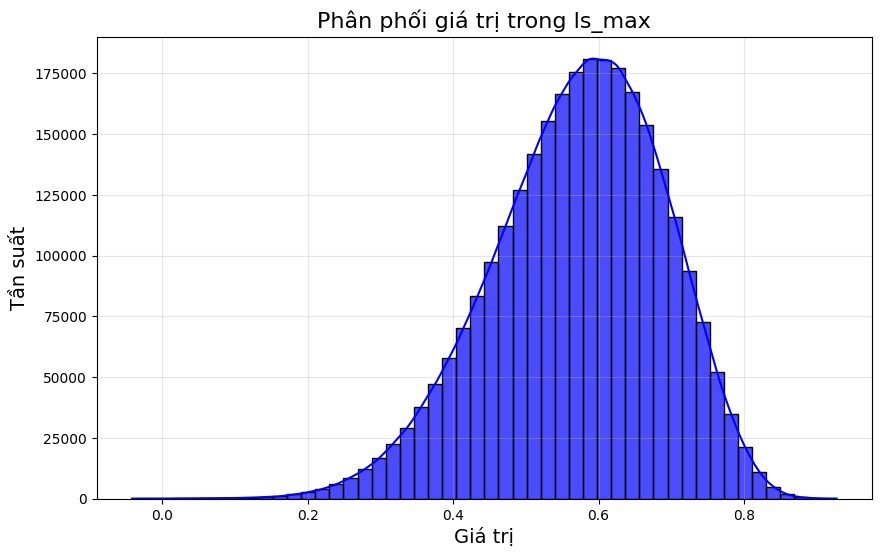

In [8]:
import seaborn as sns

import matplotlib.pyplot as plt

# Visualize the distribution of ls_max
plt.figure(figsize=(10, 6))
sns.histplot(ls_max, bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Phân phối giá trị trong ls_max', fontsize=16)
plt.xlabel('Giá trị', fontsize=14)
plt.ylabel('Tần suất', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [9]:
mean_ls_max = np.mean(ls_max)
std_ls_max = np.std(ls_max)

print(f"Mean of ls_max: {mean_ls_max:.4f}")
print(f"Standard deviation of ls_max: {std_ls_max:.4f}")

Mean of ls_max: 0.5714
Standard deviation of ls_max: 0.1174


# Global speaker labeling

In [12]:
episode_path = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode'
global_path = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/global'
import numpy as np
import os
import json
all_data = {}
map_wav_name = {}
for playlist_name in os.listdir(episode_path):
    playlist_path = os.path.join(episode_path, playlist_name)

    for file_name in os.listdir(playlist_path):
        if file_name.endswith('.json'):
            file_path3 = os.path.join(playlist_path, file_name)
            with open(file_path3, 'r', encoding='utf-8') as f:
                data = json.load(f)
                for id_key, value in data.items():
                    unique_key = f"{playlist_name}__{file_name[:-5]}__{id_key}"  # Ghép file_path và id_key
                    embeddings = value['average_embedding']
                    if isinstance(embeddings[0], list):
                        embedding = np.mean(np.array(embeddings), axis=0)
                    else:
                        embedding = np.array(embeddings)
                    all_data[unique_key] = embedding
                    map_wav_name[unique_key] = value['wav_names']
all_data

{'BeeKPBlackYT__5 FANDOM ĐÁNG SỢ KHIẾN BẠN SẼ SỐC RÙNG MÌNH__00': array([ 2.71127801e+01,  5.08289583e+00, -3.40583742e+01,  7.51492944e+00,
         5.24217112e+00,  1.56610519e+01, -7.99772859e-02,  4.46376972e+01,
        -2.42225098e+00,  7.69304177e+00,  3.90795250e+01, -2.01211368e+00,
         4.32580403e+00, -8.27349438e+00, -1.80716970e+01, -6.84827061e+00,
        -3.68325314e+00, -1.19387497e+01, -1.58258469e+01, -1.86814806e+01,
         4.26321146e+01, -4.04287548e+01, -9.72554455e+00,  1.69014739e+01,
         7.12970836e+00, -1.20698793e+01, -1.08609194e+01, -6.70072480e+00,
        -6.89613768e+00, -1.94781724e+01, -1.13782056e-01, -1.66031427e+01,
        -8.81212030e+00, -8.57333916e+00, -8.39802595e+00, -2.65270701e+01,
         2.51675274e+01, -3.64979705e+00,  1.31350552e+01,  5.32809155e+01,
         2.86761385e+00,  4.73009999e+00, -1.25638960e+01, -3.61879876e+01,
         1.00510863e+01,  9.86520946e-03, -2.49762882e+01, -5.34033630e+01,
         6.82411827e+01

In [13]:
len(all_data.keys())

1334

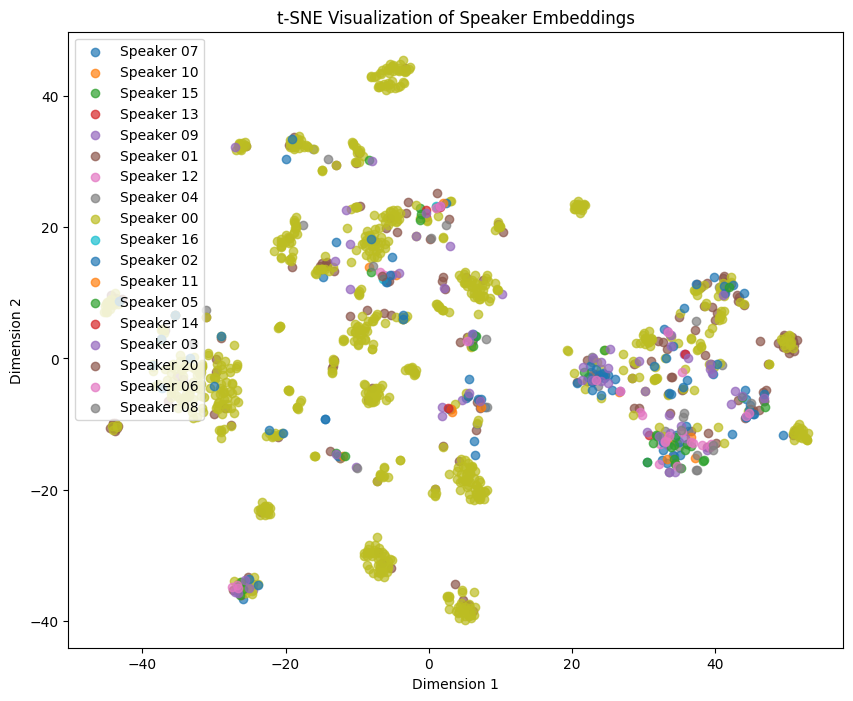

In [14]:
import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

# Extract embeddings and labels
embeddings = np.array(list(all_data.values()))
labels = [key.split('_')[-1] for key in all_data.keys()]  # Extract speaker IDs from unique keys

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
for speaker in set(labels):
    indices = [i for i, label in enumerate(labels) if label == speaker]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=f"Speaker {speaker}", alpha=0.7)

plt.title("t-SNE Visualization of Speaker Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend()
plt.show()

In [15]:
from scipy.sparse.csgraph import connected_components
from audio_processing.cosine_pair import cos_pair

id_list = list(all_data.keys())
embeddings = [all_data[id_] for id_ in id_list]
n = len(id_list)

# Tạo ma trận adjacency
adjacency = np.zeros((n, n), dtype=bool)
threshold = 0.97

for i in range(n):
    for j in range(i+1, n):
        if cos_pair(embeddings[i], embeddings[j]) > threshold:
            adjacency[i][j] = True
            adjacency[j][i] = True

# Tìm các thành phần liên thông
_, labels = connected_components(adjacency, directed=False)

# Gom nhóm id theo thành phần liên thông
components = {}
for idx, label in enumerate(labels):
    components.setdefault(label, []).append(id_list[idx])

# Kết quả: list các nhóm id liên thông
list_connected_components = list(components.values())

In [16]:
len(list_connected_components)

467

In [17]:
dct_connected_components = {}
for i, component in enumerate(list_connected_components):
    dct_connected_components[f'SPEAKER_{i+1}'] = []
    for id_ in component:   #'CoSuPhantichgame_ARG Happy Meat Farm - Trại động vật vui vẻ_00',  'CoSuPhantichgame_Alternate Watch： Thế thân ảo lòi trong Mandela Catalogue_00',
        playlist_name, episode_name, temp = id_.split('__')
        wav_ls = map_wav_name[id_]
        
        dct_connected_components[f'SPEAKER_{i+1}'].append({
                'playlist_name': playlist_name,
                'episode_name': episode_name,
                'wav_ls': wav_ls
            })
dct_connected_components


{'SPEAKER_1': [{'playlist_name': 'BeeKPBlackYT',
   'episode_name': '5 FANDOM ĐÁNG SỢ KHIẾN BẠN SẼ SỐC RÙNG MÌNH',
   'wav_ls': ['SPEAKER_00_52.21_201.03_1.wav',
    'SPEAKER_00_52.21_201.03_2.wav',
    'SPEAKER_00_52.21_201.03_3.wav',
    'SPEAKER_00_52.21_201.03_9.wav',
    'SPEAKER_00_201.21_567.69_0.wav',
    'SPEAKER_00_201.21_567.69_1.wav',
    'SPEAKER_00_201.21_567.69_2.wav',
    'SPEAKER_00_201.21_567.69_3.wav',
    'SPEAKER_00_201.21_567.69_5.wav',
    'SPEAKER_00_201.21_567.69_7.wav',
    'SPEAKER_00_201.21_567.69_8.wav',
    'SPEAKER_00_201.21_567.69_9.wav',
    'SPEAKER_00_201.21_567.69_10.wav',
    'SPEAKER_00_201.21_567.69_11.wav',
    'SPEAKER_00_201.21_567.69_14.wav',
    'SPEAKER_00_201.21_567.69_15.wav',
    'SPEAKER_00_201.21_567.69_18.wav',
    'SPEAKER_00_201.21_567.69_20.wav',
    'SPEAKER_00_201.21_567.69_24.wav',
    'SPEAKER_00_201.21_567.69_25.wav',
    'SPEAKER_00_201.21_567.69_26.wav',
    'SPEAKER_00_201.21_567.69_28.wav',
    'SPEAKER_00_201.21_567.69_29.

In [18]:
num_audio_files = 0
for key, value in dct_connected_components.items():
    for item in value:
        num_audio_files += len(item['wav_ls'])
print(f"Total number of audio files: {num_audio_files}")


Total number of audio files: 62503


In [19]:
cnt = 0
cnt_ok =0 
r = []
for key, value in dct_connected_components.items():
    cnt_wav = 0
    for item in value:
        cnt_wav += len(item['wav_ls'])
    if cnt_wav >= 40:
        cnt_ok += 1
    if cnt_wav <40:
        # print(f"Speaker {key} has less than 40 wav files, skipping...")
        continue
    cnt += 1
    print(f"Speaker {key} has {len(value)} episodes  with {cnt_wav} audio files.")
    r.append([cnt_wav, key, value])
cnt
# cnt = 0
# cnt_ok = 0
# tmp_dct = {}
# for key, value in dct_connected_components.items():
#     cnt_wav = 0
#     for item in value:
#         cnt_wav += len(item['wav_ls'])
#     if cnt_wav >= 40:
#         cnt_ok += 1
#     print(f"Speaker {key} has {len(value)} episodes  with {cnt_wav} audio files.")
# cnt_ok

Speaker SPEAKER_1 has 24 episodes  with 2580 audio files.
Speaker SPEAKER_2 has 1 episodes  with 87 audio files.
Speaker SPEAKER_3 has 5 episodes  with 331 audio files.
Speaker SPEAKER_4 has 1 episodes  with 65 audio files.
Speaker SPEAKER_5 has 1 episodes  with 919 audio files.
Speaker SPEAKER_7 has 1 episodes  with 45 audio files.
Speaker SPEAKER_9 has 6 episodes  with 441 audio files.
Speaker SPEAKER_10 has 1 episodes  with 126 audio files.
Speaker SPEAKER_11 has 1 episodes  with 68 audio files.
Speaker SPEAKER_12 has 1 episodes  with 79 audio files.
Speaker SPEAKER_15 has 4 episodes  with 254 audio files.
Speaker SPEAKER_16 has 1 episodes  with 140 audio files.
Speaker SPEAKER_17 has 1 episodes  with 117 audio files.
Speaker SPEAKER_18 has 3 episodes  with 166 audio files.
Speaker SPEAKER_20 has 1 episodes  with 152 audio files.
Speaker SPEAKER_21 has 1 episodes  with 77 audio files.
Speaker SPEAKER_23 has 1 episodes  with 188 audio files.
Speaker SPEAKER_26 has 31 episodes  with 8

167

In [12]:
import random
import os
import subprocess
from IPython.display import Audio, display


def process_and_play(speaker):
    base_path = "/home4/tuanlha/EXpressiveTTS/dataRawProcess/04_denoise"
    data = dct_connected_components[speaker]
    print(f'Speaker: {speaker}')
    
    if len(data) > 1:
        playlist_name1 = data[0]['playlist_name']
        episode_name1 = data[0]['episode_name']
        wav_ls1 = data[0]['wav_ls']
        path1 = f"{base_path}/{playlist_name1}/{episode_name1}/{wav_ls1[0]}"
        print(f"Playing first audio from {playlist_name1} - {episode_name1}: {wav_ls1[0]}")
        display(Audio(path1, autoplay=False))

        playlist_name2 = data[1]['playlist_name']
        episode_name2 = data[1]['episode_name']
        wav_ls2 = data[1]['wav_ls']
        path2 = f"{base_path}/{playlist_name2}/{episode_name2}/{wav_ls2[0]}"
        print(f"Playing second audio from {playlist_name2} - {episode_name2}: {wav_ls2[0]}")
        display(Audio(path2, autoplay=False))

    else:
        playlist_name = data[0]['playlist_name']
        episode_name = data[0]['episode_name']
        wav_ls = data[0]['wav_ls']
        print(f'Playlist audio files for {playlist_name}, episode {episode_name}:')
        chosen = wav_ls if len(wav_ls) < 2 else random.sample(wav_ls, 2)
        for wav_name in chosen:
            path = f"{base_path}/{playlist_name}/{episode_name}/{wav_name}"
            display(Audio(path, autoplay=False))

In [20]:
# Sắp xếp dct_tmp theo giá trị đầu tiên (số lượng wav files) giảm dần
sorted_dct_tmp = sorted(r, key=lambda x: x[0], reverse=True)
# Chọn ra 100 phần tử đầu tiên
top_100_dct_tmp = sorted_dct_tmp[:100]

top_100_speaker = []
for cnt_wav, speaker, value in top_100_dct_tmp:
    top_100_speaker.append(speaker)


# In ra thông tin
for i, (cnt_wav, speaker, value) in enumerate(top_100_dct_tmp):
    print(f"{i+1}. Speaker: {speaker}, Number of wav files: {cnt_wav}")

1. Speaker: SPEAKER_185, Number of wav files: 5385
2. Speaker: SPEAKER_101, Number of wav files: 5093
3. Speaker: SPEAKER_293, Number of wav files: 4793
4. Speaker: SPEAKER_127, Number of wav files: 3143
5. Speaker: SPEAKER_1, Number of wav files: 2580
6. Speaker: SPEAKER_304, Number of wav files: 2119
7. Speaker: SPEAKER_236, Number of wav files: 1985
8. Speaker: SPEAKER_178, Number of wav files: 1537
9. Speaker: SPEAKER_311, Number of wav files: 1424
10. Speaker: SPEAKER_155, Number of wav files: 1292
11. Speaker: SPEAKER_133, Number of wav files: 1187
12. Speaker: SPEAKER_137, Number of wav files: 1089
13. Speaker: SPEAKER_5, Number of wav files: 919
14. Speaker: SPEAKER_26, Number of wav files: 849
15. Speaker: SPEAKER_161, Number of wav files: 772
16. Speaker: SPEAKER_303, Number of wav files: 755
17. Speaker: SPEAKER_237, Number of wav files: 748
18. Speaker: SPEAKER_294, Number of wav files: 676
19. Speaker: SPEAKER_260, Number of wav files: 663
20. Speaker: SPEAKER_228, Number 

In [21]:
dct_episode_speaker_based = {}
for cnt_wav, speaker, value in top_100_dct_tmp:
    dct_episode_speaker_based[speaker] = []
    for item in value:
        if item['playlist_name'] not in dct_episode_speaker_based[speaker]:
            dct_episode_speaker_based[speaker].append(item['playlist_name'])
dct_episode_speaker_based

{'SPEAKER_185': ['CoSuCottruyen', 'CoSuPhantichgame'],
 'SPEAKER_101': ['TheReviewerClean', 'VuiVe', 'VanVo', 'Long'],
 'SPEAKER_293': ['TacaChannel'],
 'SPEAKER_127': ['DuyThanhNguyenCritical', 'DuyThanhNguyenFinance'],
 'SPEAKER_1': ['BeeKPBlackYT'],
 'SPEAKER_304': ['CDMediaKhamPhaVuTruNguyenThuy'],
 'SPEAKER_236': ['SpiderumGiaoDuc', 'SpiderumQuanDiem'],
 'SPEAKER_178': ['BattleCryKhamPha'],
 'SPEAKER_311': ['HocVienBoVaGau'],
 'SPEAKER_155': ['CuThongThai'],
 'SPEAKER_133': ['VietNguyenAI'],
 'SPEAKER_137': ['PheGame', 'PerKhaiPha'],
 'SPEAKER_5': ['BeeKPBlackYT'],
 'SPEAKER_26': ['HaveASipClean'],
 'SPEAKER_161': ['DuongFGTongHop'],
 'SPEAKER_303': ['CDMediaKhamPhaVuTruNguyenThuy'],
 'SPEAKER_237': ['SpiderumGiaoDuc', 'SpiderumQuanDiem'],
 'SPEAKER_294': ['ShowViet'],
 'SPEAKER_260': ['THPTQGDiaLy'],
 'SPEAKER_228': ['MMDTIQCao'],
 'SPEAKER_238': ['SpiderumGiaoDuc', 'SpiderumQuanDiem'],
 'SPEAKER_138': ['PheGame'],
 'SPEAKER_99': ['TheReviewerClean', 'VanVo'],
 'SPEAKER_175': ['B

In [36]:
import pandas as pd

rows = []
for speaker, entries in dct_connected_components.items():
    if speaker not in top_100_speaker:
        continue
    for entry in entries:
        playlist_name = entry['playlist_name']
        episode_name = entry['episode_name']
        for wav_name in entry['wav_ls']:
            rows.append({
                'speaker': speaker,
                'playlist_name': playlist_name,
                'episode_name': episode_name,
                'wav_name': wav_name
            })

df = pd.DataFrame(rows)
df.to_csv('/home4/tuanlha/EXpressiveTTS/dataRawProcess/_Analysys_data/speaker_data.csv', index=False)


In [ ]:
import pandas as pd
import os

# Giả sử df đã được khai báo và có các cột: speaker, playlist_name, episode_name, wav_name

def load_nisqa_dict(playlist_name, episode_name):
    file_path = f"/home4/tuanlha/EXpressiveTTS/dataRawProcess/05_data_extract/{playlist_name}/{episode_name}_NISQA_results.csv"
    if os.path.exists(file_path):
        df_nisqa = pd.read_csv(file_path)
        return dict(zip(df_nisqa['deg'], df_nisqa['mos_pred']))
    return {}

def load_wvmos_dict(playlist_name, episode_name):
    file_path = f"/home4/tuanlha/EXpressiveTTS/dataRawProcess/05_data_extract/{playlist_name}/{episode_name}_wvmos.csv"
    if os.path.exists(file_path):
        df_wvmos = pd.read_csv(file_path)
        return dict(zip(df_wvmos['audio_path'], df_wvmos['score']))
    return {}

# Lấy danh sách các cặp playlist_name và episode_name duy nhất
unique_pairs = df[['playlist_name', 'episode_name']].drop_duplicates()

# Tạo dict ánh xạ cho từng cặp
nisqa_dicts = {}
wvmos_dicts = {}
for _, row in unique_pairs.iterrows():
    playlist = row['playlist_name']
    episode = row['episode_name']
    nisqa_dicts[(playlist, episode)] = load_nisqa_dict(playlist, episode)
    wvmos_dicts[(playlist, episode)] = load_wvmos_dict(playlist, episode)

# Hàm tra cứu nhanh
def get_mos_pred_fast(row):
    key = (row['playlist_name'], row['episode_name'])
    return nisqa_dicts.get(key, {}).get(row['wav_name'], None)

def get_wv_pred_fast(row):
    key = (row['playlist_name'], row['episode_name'])
    return wvmos_dicts.get(key, {}).get(row['wav_name'], None)

# Thêm 2 cột mới
df['mos_pred'] = df.apply(get_mos_pred_fast, axis=1)
df['wv_pred'] = df.apply(get_wv_pred_fast, axis=1)
df.to_csv('/home4/tuanlha/EXpressiveTTS/dataRawProcess/_Analysys_data/speaker_data.csv', index=False)


In [32]:
# Tính toán số lượng audio cho mỗi speaker
speaker_audio_count = {speaker: sum(len(entry['wav_ls']) for entry in entries) for speaker, entries in tmp_dct.items()}
speaker_audio_count

{'SPEAKER_1': 1660,
 'SPEAKER_2': 1063,
 'SPEAKER_3': 82,
 'SPEAKER_4': 51,
 'SPEAKER_6': 46,
 'SPEAKER_7': 50,
 'SPEAKER_8': 153,
 'SPEAKER_11': 88,
 'SPEAKER_13': 49,
 'SPEAKER_14': 48,
 'SPEAKER_15': 116,
 'SPEAKER_16': 125,
 'SPEAKER_17': 136,
 'SPEAKER_18': 58,
 'SPEAKER_19': 108,
 'SPEAKER_20': 72,
 'SPEAKER_21': 66,
 'SPEAKER_24': 91,
 'SPEAKER_25': 137,
 'SPEAKER_26': 112,
 'SPEAKER_27': 40,
 'SPEAKER_30': 73,
 'SPEAKER_31': 80,
 'SPEAKER_32': 150,
 'SPEAKER_33': 68,
 'SPEAKER_35': 154,
 'SPEAKER_39': 116,
 'SPEAKER_40': 361,
 'SPEAKER_41': 64,
 'SPEAKER_42': 111,
 'SPEAKER_44': 136,
 'SPEAKER_45': 135,
 'SPEAKER_47': 295,
 'SPEAKER_49': 101,
 'SPEAKER_50': 233,
 'SPEAKER_51': 108,
 'SPEAKER_54': 62,
 'SPEAKER_56': 91,
 'SPEAKER_58': 110,
 'SPEAKER_62': 69,
 'SPEAKER_66': 45,
 'SPEAKER_69': 97,
 'SPEAKER_71': 294,
 'SPEAKER_80': 41,
 'SPEAKER_81': 113,
 'SPEAKER_84': 81,
 'SPEAKER_85': 50,
 'SPEAKER_87': 100,
 'SPEAKER_88': 42,
 'SPEAKER_89': 86,
 'SPEAKER_90': 52,
 'SPEAKER_91

/tmp/ipykernel_25630/31088475.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(audio_counts, shade=True, color='blue', alpha=0.7)


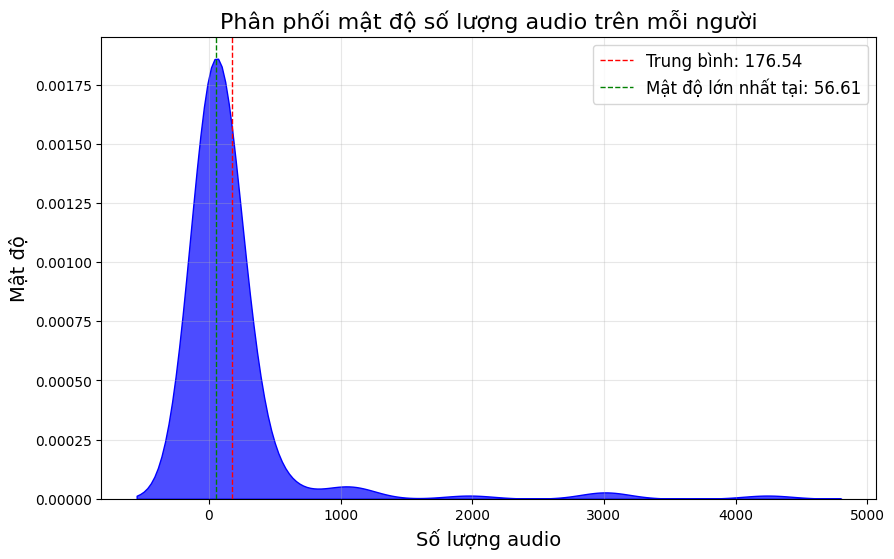

Giá trị số lượng audio có mật độ lớn nhất là: 56.61


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Giả sử speaker_audio_count là một dictionary chứa số lượng audio của từng người
audio_counts = np.array(list(speaker_audio_count.values()))

# Tính toán số lượng audio trung bình trên mỗi người
average_audio_per_speaker = np.mean(audio_counts)

# Tính mật độ KDE bằng scipy
kde = gaussian_kde(audio_counts)
x_vals = np.linspace(min(audio_counts), max(audio_counts), 1000)
y_vals = kde(x_vals)

# Tìm giá trị x có mật độ lớn nhất
max_density_index = np.argmax(y_vals)
max_density_x = x_vals[max_density_index]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.kdeplot(audio_counts, shade=True, color='blue', alpha=0.7)
plt.axvline(average_audio_per_speaker, color='red', linestyle='dashed', linewidth=1, label=f'Trung bình: {average_audio_per_speaker:.2f}')
plt.axvline(max_density_x, color='green', linestyle='dashed', linewidth=1, label=f'Mật độ lớn nhất tại: {max_density_x:.2f}')
plt.title('Phân phối mật độ số lượng audio trên mỗi người', fontsize=16)
plt.xlabel('Số lượng audio', fontsize=14)
plt.ylabel('Mật độ', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

print(f'Giá trị số lượng audio có mật độ lớn nhất là: {max_density_x:.2f}')


# T-SNE của từng episode

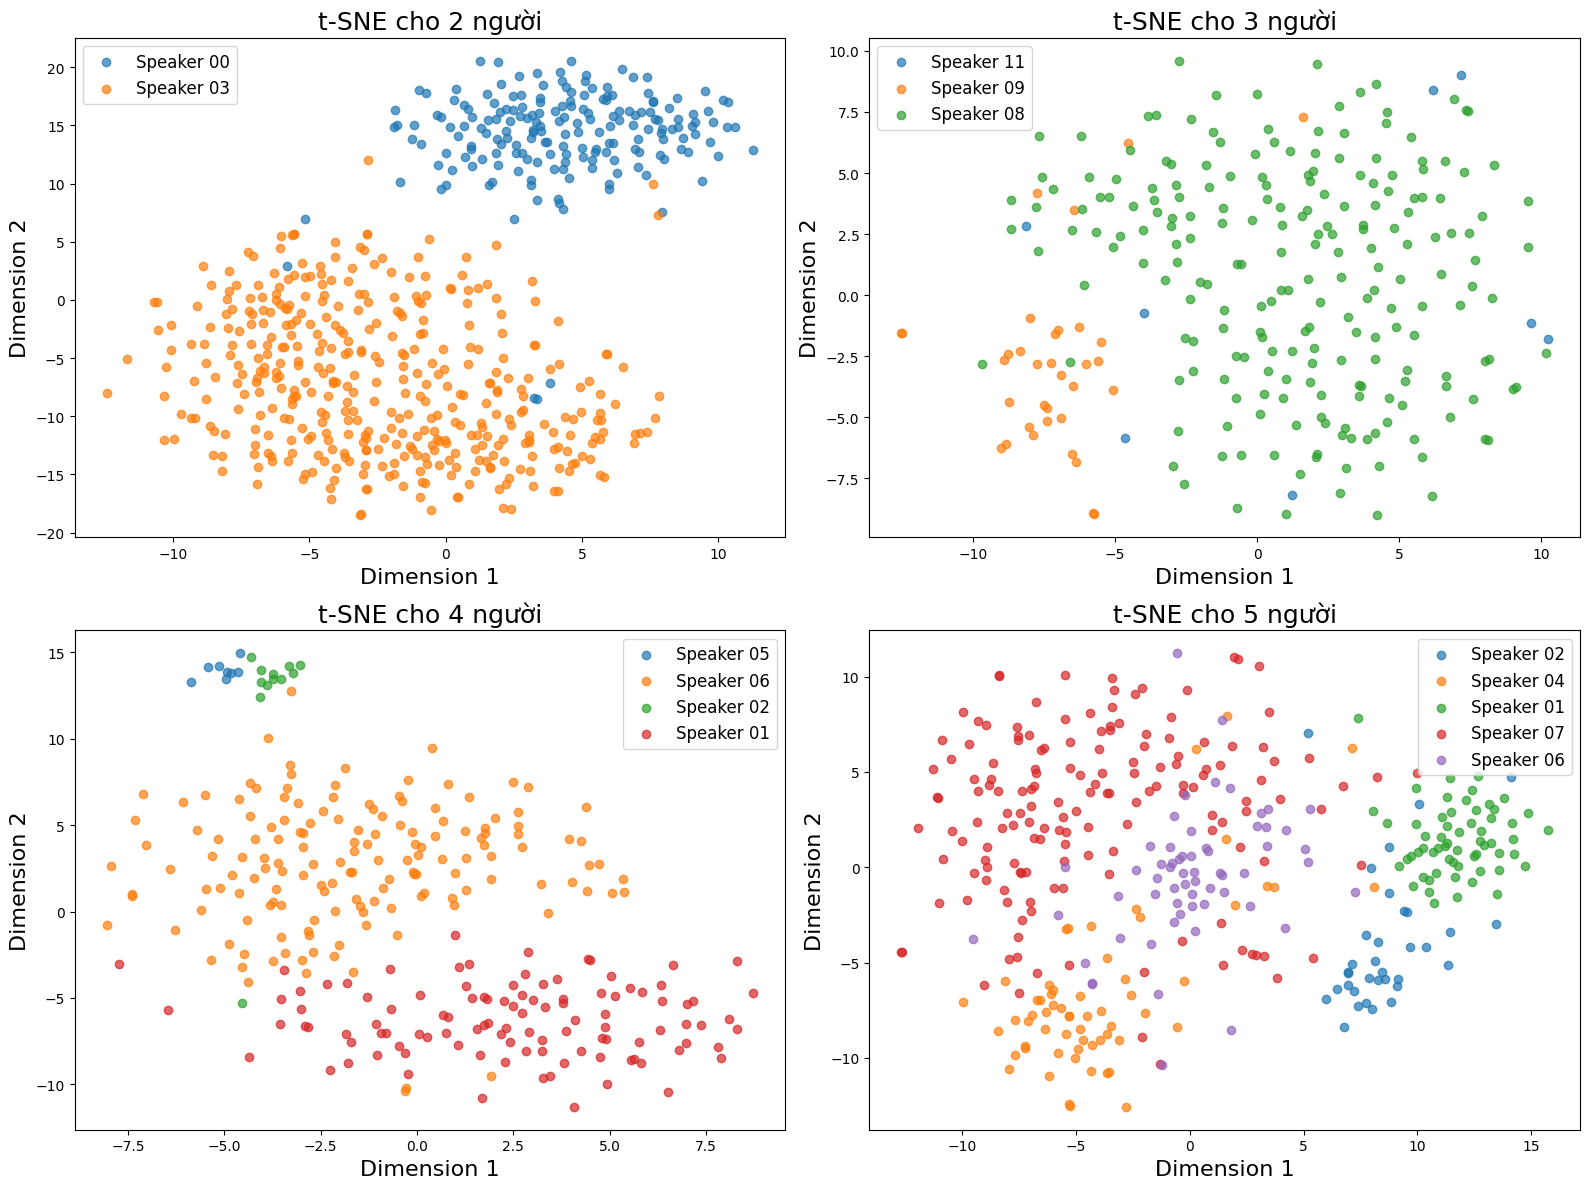

In [43]:
file_paths = [file_path2, file_path3, file_path4, file_path5]
titles = ["t-SNE cho 2 người", "t-SNE cho 3 người", "t-SNE cho 4 người", "t-SNE cho 5 người"]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, (file_path, title) in enumerate(zip(file_paths, titles)):
    with open(file_path, 'r') as f:
        data = json.load(f)
    list_embeddings = np.array([value['global_embedding'] for value in data.values() if 'global_embedding' in value])
    labels = [value['speaker_id'] for value in data.values() if 'global_embedding' in value]
    
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    reduced_embeddings = tsne.fit_transform(list_embeddings)
    
    unique_speakers = set(labels)
    for speaker in unique_speakers:
        indices = [j for j, label in enumerate(labels) if label == speaker]
        axes[i].scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], label=f"Speaker {speaker}", alpha=0.7)
    
    axes[i].set_title(title, fontsize=18)
    axes[i].set_xlabel("Dimension 1", fontsize=16)
    axes[i].set_ylabel("Dimension 2", fontsize=16)
    axes[i].legend(fontsize=12)

plt.tight_layout()
plt.show()

# TSNE tất cả các nhúgn đại diện

In [44]:
folder_path = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode/CuThongThai/9 Mẹo cứu túi Tiền cho người trẻ ｜ Biết sớm Giàu sớm.json'
import json
with open(folder_path, 'r') as f:
    data = json.load(f)

data

{'00': {'average_embedding': [38.5074667930603,
   11.380632716417313,
   -26.58765379190445,
   12.088412189483643,
   7.403536808490753,
   2.140909267961979,
   6.203540422022343,
   43.0863697052002,
   -1.715991234779358,
   5.496447229385376,
   27.350405120849608,
   -1.0960191570222377,
   9.4091004550457,
   0.24858287200331688,
   -6.224821197986603,
   -11.255144891142844,
   0.6705729156732559,
   16.340266382694246,
   -8.312326651811599,
   -21.219676399230956,
   22.316689942777156,
   -7.05575478002429,
   -4.757778035104275,
   15.025283145904542,
   4.697911655902862,
   1.9690461173653602,
   -18.097183728218077,
   -11.409754794836044,
   10.818954348564148,
   -30.75397789478302,
   -4.2755416363477705,
   -17.834793519973754,
   -22.220145177841186,
   -17.257494497299195,
   -8.068602895736694,
   -27.192881870269776,
   9.989214111864566,
   7.771300294995308,
   6.330190598964691,
   64.28300094604492,
   16.39974446296692,
   -8.111971145868301,
   -5.17808548

In [45]:
folder_path = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode'

In [46]:
import os
import json
import numpy as np
from scipy.sparse.csgraph import connected_components
from audio_processing.cosine_pair import cos_pair

# Define paths
episode_path = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/episode'
global_path = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/08_connect_speaker/global'

# Initialize global data
global_speaker_embeddings = {}
global_mapping = {}

# Iterate through playlists and episodes
for playlist_name in os.listdir(episode_path):
    playlist_path = os.path.join(episode_path, playlist_name)
    
    for file_name in os.listdir(playlist_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(playlist_path, file_name)
            
            # Load episode data
            with open(file_path, 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # Process each speaker in the episode
                for speaker_id, value in data.items():
                    embedding = np.array(value['average_embedding'])
                    
                    # Check if the speaker is already in the global mapping
                    matched = False
                    for global_id, global_embedding in global_speaker_embeddings.items():
                        if cos_pair(embedding, global_embedding) > 0.97:  # Threshold for similarity
                            global_mapping[f"{playlist_name}_{file_name}_{speaker_id}"] = global_id
                            matched = True
                            break
                    
                    # If not matched, add as a new global speaker
                    if not matched:
                        new_global_id = f"GLOBAL_{len(global_speaker_embeddings)}"
                        global_speaker_embeddings[new_global_id] = embedding
                        global_mapping[f"{playlist_name}_{file_name}_{speaker_id}"] = new_global_id

# Save global speaker embeddings and mapping to server
os.makedirs(global_path, exist_ok=True)

global_embeddings_path = os.path.join(global_path, 'global_speaker_embeddings.json')
with open(global_embeddings_path, 'w', encoding='utf-8') as f:
    json.dump({key: value.tolist() for key, value in global_speaker_embeddings.items()}, f, ensure_ascii=False, indent=4)

global_mapping_path = os.path.join(global_path, 'global_mapping.json')
with open(global_mapping_path, 'w', encoding='utf-8') as f:
    json.dump(global_mapping, f, ensure_ascii=False, indent=4)

print("Global speaker embeddings and mapping have been saved to the server.")

Global speaker embeddings and mapping have been saved to the server.


# Di chuyển dữ liệu sẽ push

In [7]:
import pandas as pd
import shutil
import os

df = pd.read_csv('/home4/tuanlha/EXpressiveTTS/dataRawProcess/_Analysys_data/speaker_data.csv')
audio_folder = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/04_denoise'
save_folder = '/home4/tuanlha/EXpressiveTTS/dataRawProcess/_Push_data'
for index, row in df.iterrows():
    speaker = row['speaker']
    playlist_name = row['playlist_name']
    episode_name = row['episode_name']
    wav_name = row['wav_name']
    base_name = wav_name.rsplit('.', 1)[0]
    os.makedirs(os.path.join(save_folder, speaker), exist_ok=True)
    wav_path = os.path.join(audio_folder, playlist_name, episode_name, f'{base_name}.wav')
    des_path = os.path.join(save_folder, speaker, f'{playlist_name}__{episode_name}__{base_name}.wav')
    shutil.copy(wav_path, des_path)
    

In [ ]:
import subprocess

start = 42
for i in range (67):
    command = [
            "cp", "-r",
            f"/home4/tuanlha/EXpressiveTTS/dataRawProcess/_Push_data/SPEAKER_{start+i}", f"SPEAKER_{start+i}"
        ]
    
    print(" ".join(command))
    subprocess.run(command, cwd="/home4/tuanlha/EXpressiveTTS/dataRawProcess/_Push_zip")